In [3]:
# %matplotlib inline
%pylab inline
import scipy
from pyiga import bspline, assemble, vform, geometry, vis, solvers
import numpy as np
import matplotlib.pyplot as plt

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


c:\Users\mechadmin\Documents\GitHub\pyiga\.venv\lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


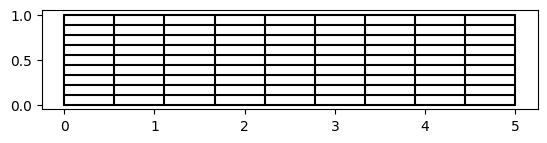

In [3]:
G = geometry.tensor_product(geometry.line_segment(0,1),
                            geometry.line_segment(0,5, intervals=3))
vis.plot_geo(G)
axis('scaled');

[0.56101698 0.57039854 0.59794184 0.64188128 0.69940022 0.76681156
 0.83979406 0.91366933 0.9837018  1.04540219 1.09481535 1.12877377
 1.14510062 1.14274932 1.12187058 1.08380278 1.03098619 0.96680646
 0.89537769 0.82127866 0.74925929 0.68393622 0.62949683 0.58943082
 0.56630654 0.56160629 0.57563139 0.60748279 0.65511873 0.71548562
 0.78471379 0.85836554 0.93171958 1.00007375 1.05904636 1.10485711
 1.13456942 1.14627865 1.1392342  1.11388764 1.07186376 1.0158564
 0.94945577 0.87691832 0.80289389 0.73212765 0.66915589 0.61801526
 0.58198401 0.56337185 0.56337185 0.58198401 0.61801526 0.66915589
 0.73212765 0.80289389 0.87691832 0.94945577 1.0158564  1.07186376
 1.11388764 1.1392342  1.14627865 1.13456942 1.10485711 1.05904636
 1.00007375 0.93171958 0.85836554 0.78471379 0.71548562 0.65511873
 0.60748279 0.57563139 0.56160629 0.56630654 0.58943082 0.62949683
 0.68393622 0.74925929 0.82127866 0.89537769 0.96680646 1.03098619
 1.08380278 1.12187058 1.14274932 1.14510062 1.12877377 1.09481

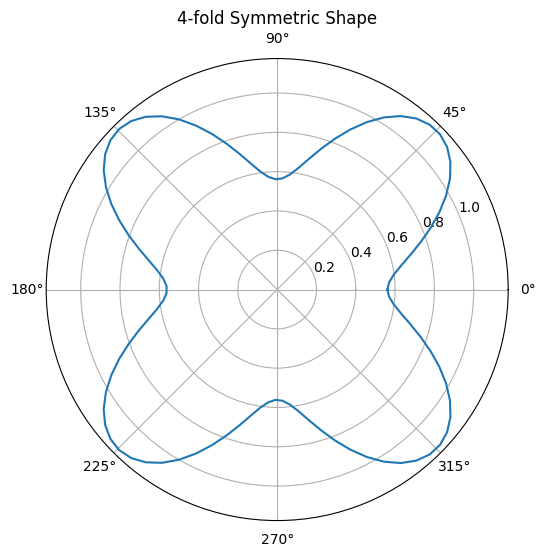

(array([ 0.56101698,  0.56925015,  0.59313129,  0.63028165,  0.67698354,
        0.72852552,  0.77963787,  0.82497629,  0.8596072 ,  0.87944828,
        0.88162224,  0.86469087,  0.8287483 ,  0.77536617,  0.70739848,
        0.62866729,  0.54356217,  0.45659473,  0.37195334,  0.29310304,
        0.22247035,  0.16124408,  0.10931098,  0.06533145,  0.02694595,
       -0.00891043, -0.04561876, -0.08645382, -0.13417268, -0.19065818,
       -0.25665474, -0.33162534, -0.41374556, -0.50003688, -0.58662703,
       -0.66911217, -0.74298496, -0.80408568, -0.84903075, -0.87557483,
       -0.88286908, -0.87158794, -0.84390994, -0.80335229, -0.75447346,
       -0.70247133, -0.65271458, -0.6102523 , -0.57934874, -0.56308821,
       -0.56308821, -0.57934874, -0.6102523 , -0.65271458, -0.70247133,
       -0.75447346, -0.80335229, -0.84390994, -0.87158794, -0.88286908,
       -0.87557483, -0.84903075, -0.80408568, -0.74298496, -0.66911217,
       -0.58662703, -0.50003688, -0.41374556, -0.33162534, -0.2

In [15]:
def cal_c(r, a, L0):
    return np.sqrt(2)*np.sqrt(np.pi*(3+3*r**2+2*r)*a*L0)/(np.pi*(3+3*r**2+2*r))
def superformula(theta, r, d, n, a, L0):
    c = cal_c(r,a,L0)
    return c*((1+r)-d*(-1)**((n+2)/2)*(r-1)*np.cos(n*theta))
d = 0.8
r = 0.4
n = 4
a = 0.1
L0 = 25
theta_values = np.linspace(0, 2 * np.pi, 100)
result = superformula(theta_values, r, d, n, a, L0)
print(result)
plt.figure(figsize=(6, 6))
plt.polar(theta_values, result)
plt.title(f"{n}-fold Symmetric Shape")
plt.show()
def polar_to_cartesian(result, theta):
    x = result * np.cos(theta)
    y = result * np.sin(theta)
    return (x,y)
print(polar_to_cartesian(result, theta_values))


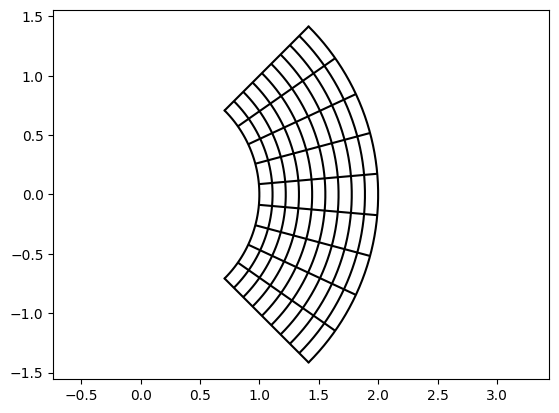

In [21]:
def f(x, y):
    r = 1 + x
    phi = (y - 0.5) * np.pi/2
    return (r * np.cos(phi), r * np.sin(phi))

f_func = geometry.UserFunction(f, [[0,1],[0,1]])
vis.plot_geo(f_func)
axis('equal');

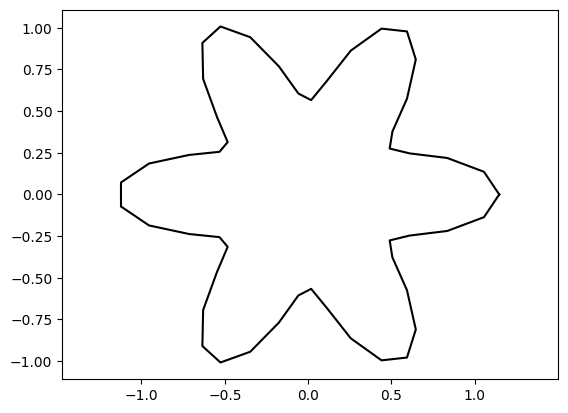

In [39]:
def cal_c(r, a, L0):
    return np.sqrt(2)*np.sqrt(np.pi*(3+3*r**2+2*r)*a*L0)/(np.pi*(3+3*r**2+2*r))
def polar_to_cartesian(result, theta):
    x = result * np.cos(theta)
    y = result * np.sin(theta)
    return (x,y)
def superformula_1(theta):
    r = 0.4
    d = 0.8
    n = 6
    a = 0.1
    L0 = 25
    c = cal_c(r,a,L0)
    res = c*((1+r)-d*(-1)**((n+2)/2)*(r-1)*np.cos(n*theta))
    return polar_to_cartesian(res,theta)
# theta_values = np.linspace(0, 2 * np.pi, 100)
# result = superformula_1(theta_values)
f_func = geometry.UserFunction(superformula_1, [[0,2*np.pi]])
vis.plot_geo(f_func)
axis('equal');

<bound method NurbsFunc.as_vector of <pyiga.geometry.NurbsFunc object at 0x00000226E64D62E0>>


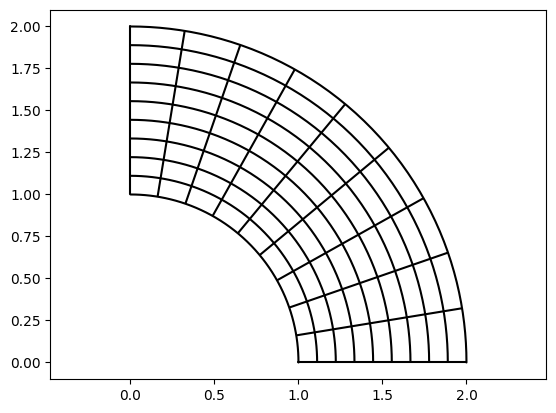

In [48]:
print(f_func)
print(geometry.line_segment(0,5, intervals=3))
f = geometry.circular_arc(pi/2)
print(f.as_vector)
vis.plot_geo(geometry.outer_product(f, geometry.line_segment(1, 2)))
axis('equal');


In [41]:
G = geometry.tensor_product(geometry.line_segment(0,1),
                            geometry.line_segment(0,5, intervals=3))
vis.plot_geo(G)
axis('scaled');

AssertionError: 

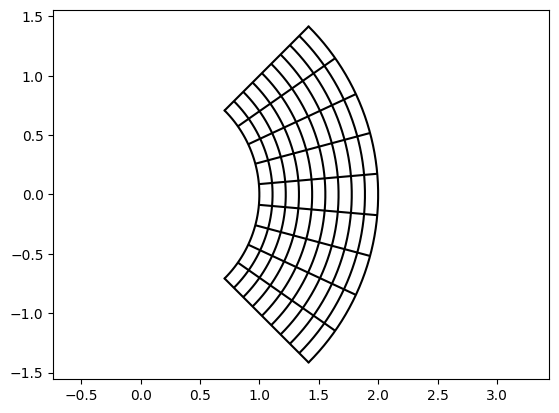

In [4]:
def f(x, y):
    r = 1 + x
    phi = (y - 0.5) * np.pi/2
    return (r * np.cos(phi), r * np.sin(phi))

f_func = geometry.UserFunction(f, [[0,1],[0,1]])
vis.plot_geo(f_func)
axis('equal');